In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from seaborn import set_style
import statsmodels.tsa.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima.utils import ndiffs
from pmdarima import auto_arima
set_style("whitegrid")

In [2]:
# stock_symbols = ['GOOG']
stock_symbols = ['GOOG','MSFT','AMZN','NVDA','AAPL']

In [3]:
df = [pd.read_csv(f'/home/hirak/Desktop/Erdos/SIGNS_2024/stock_data/{symbol}/stock_price.csv') for symbol in stock_symbols]
df_ss = [pd.read_csv(f'/home/hirak/Desktop/Erdos/SIGNS_2024/stock_news_sentiment_scores/2011-2024/stock_news_sentiment_analysis_results_{symbol}.csv') for symbol in stock_symbols]

In [4]:
for i in range(len(df)):
    df[i]['Date'] = pd.to_datetime(df[i]['Date'], utc=True).dt.date
    df_ss[i]['Date'] = pd.to_datetime(df_ss[i]['Date'], utc=True).dt.date
    print(len(df[i]), len(df_ss[i]))

3457 1663
3457 1626
3457 1979
3457 1486
3457 1997


In [5]:
# Ensure the 'date' column is in datetime format
# df1['date'] = pd.to_datetime(df1['date'])
# df2['date'] = pd.to_datetime(df2['date'])

# Merge on the 'date' column, only take common days from both dataframes
df = [pd.merge(df[i], df_ss[i], on='Date', how='outer') for i in range(len(df))]  # 'how' can be 'inner', 'outer', 'left', or 'right'
df = [df[i].drop(['Ticker'],axis=1) for i in range(len(df))]
for i in range(len(df)):
    print(len(df[i]))

3789
3744
3913
3741
3892


In [6]:
df = [df[i].dropna(subset=['Open']) for i in range(len(df))]
df = [df[i].fillna(0.0) for i in range(len(df))]

In [7]:
df[0].head(-5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,weighted positive sentiment score,weighted negative sentiment score,weighted neutral sentiment score,weighted compound sentiment score
0,2011-01-03,14.819920,15.046263,14.819920,15.015455,94962614.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,2011-01-04,15.047010,15.060922,14.910357,14.960049,73253547.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2,2011-01-05,14.909116,15.164031,14.908619,15.132727,101671667.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
3,2011-01-06,15.172727,15.365282,15.157075,15.242792,82620526.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
4,2011-01-07,15.302670,15.360810,15.159063,15.315838,84363033.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3737,2024-09-16,158.330002,159.240005,157.610001,158.990005,14157600.0,0.0,0.0,0.368930,0.304656,0.760461,0.206810
3738,2024-09-17,160.089996,161.589996,159.410004,160.279999,12064800.0,0.0,0.0,0.319693,0.149000,0.879976,0.476711
3739,2024-09-18,160.850006,161.630005,159.660004,160.809998,16756500.0,0.0,0.0,0.339090,0.305160,0.759004,0.414720
3740,2024-09-19,164.820007,164.990005,162.522003,163.240005,17548200.0,0.0,0.0,0.254319,0.204681,0.865323,0.148532


In [8]:
# df_close = [df[i][["Close"]].copy() for i in range(len(df))]

In [8]:
for i in range(len(df)):
    result = adfuller(df[i].Close.dropna())
    print(f'ADF statistic: {result[0]}')
    print(f'p-value: {result[1]}')

ADF statistic: 0.7789685919979568
p-value: 0.9912889838443667
ADF statistic: 1.9139058494760641
p-value: 0.9985500660721444
ADF statistic: 0.01313244457387149
p-value: 0.9596047488905579
ADF statistic: 3.079398028204449
p-value: 1.0
ADF statistic: 1.1115832639899839
p-value: 0.9953142786169403


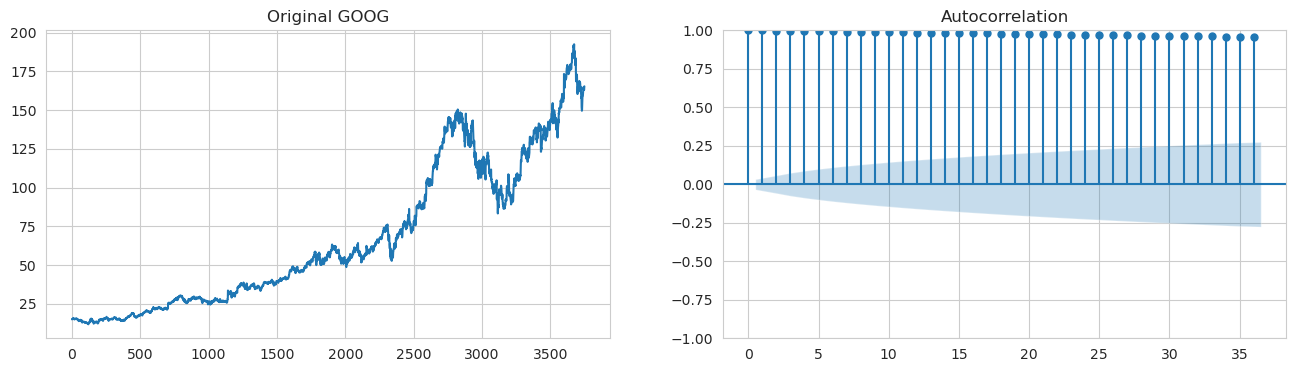

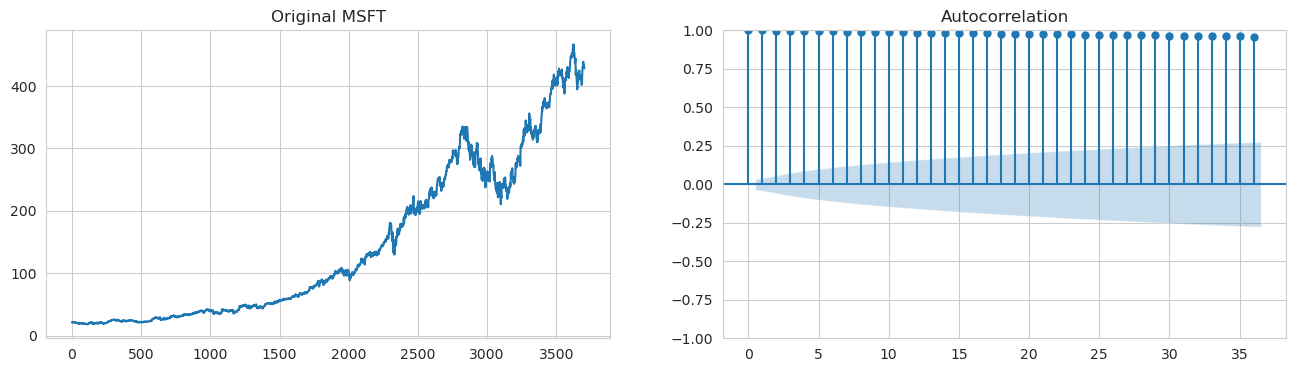

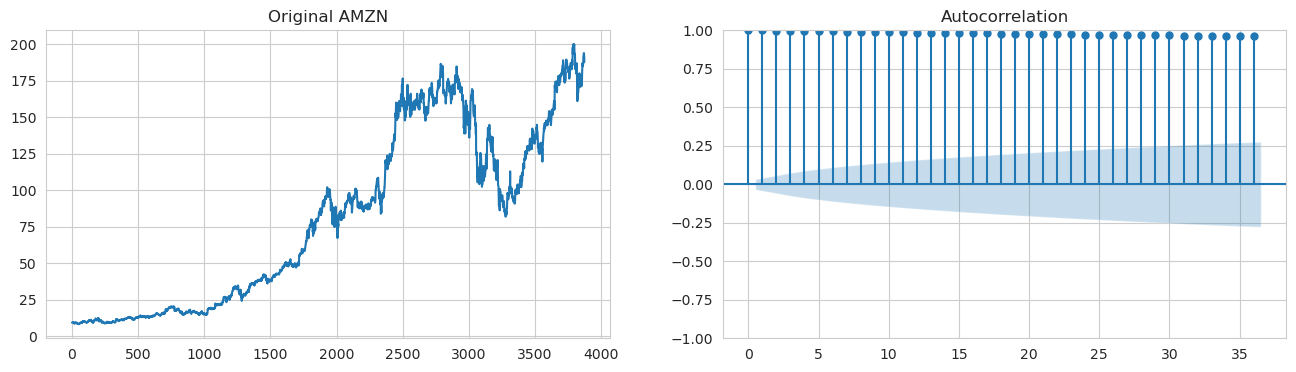

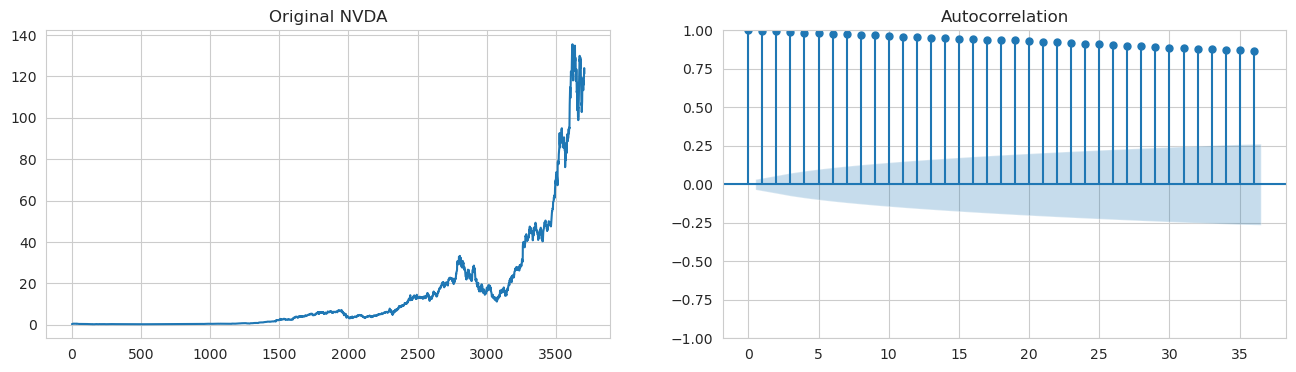

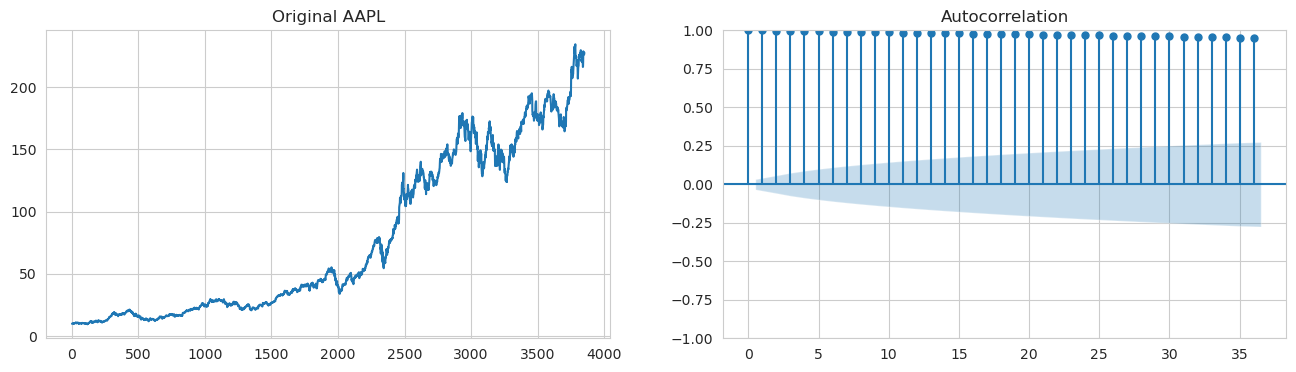

In [9]:
for i in range(len(df)):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
    ax1.plot(df[i].Close)
    ax1.set_title(f"Original {stock_symbols[i]}")
    plot_acf(df[i].Close, ax=ax2);

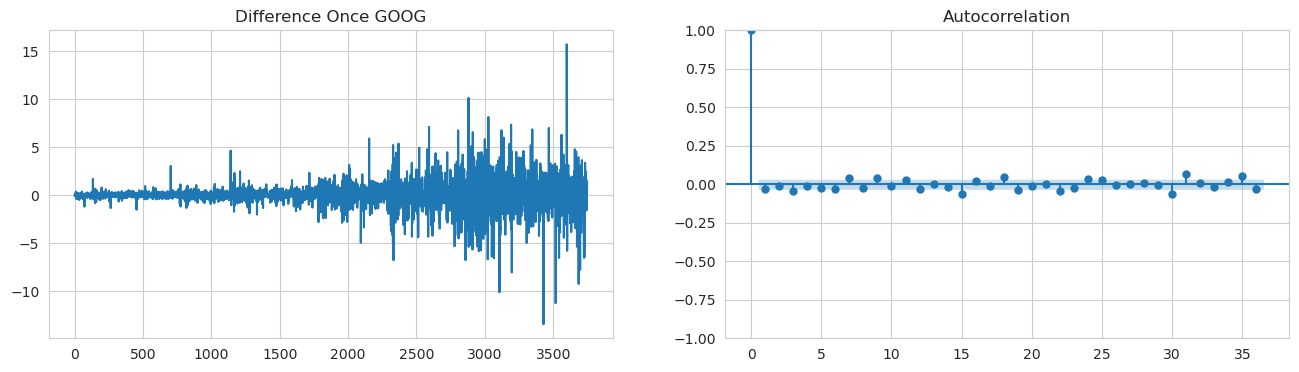

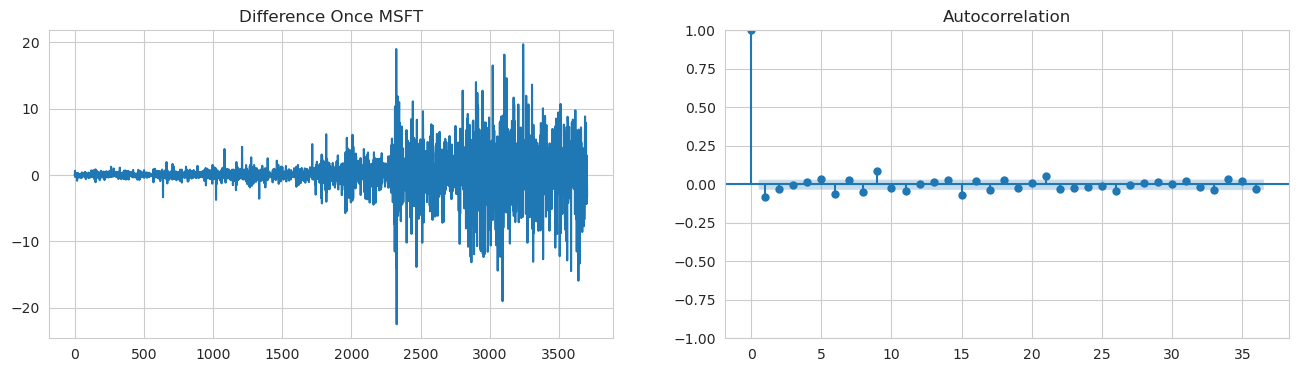

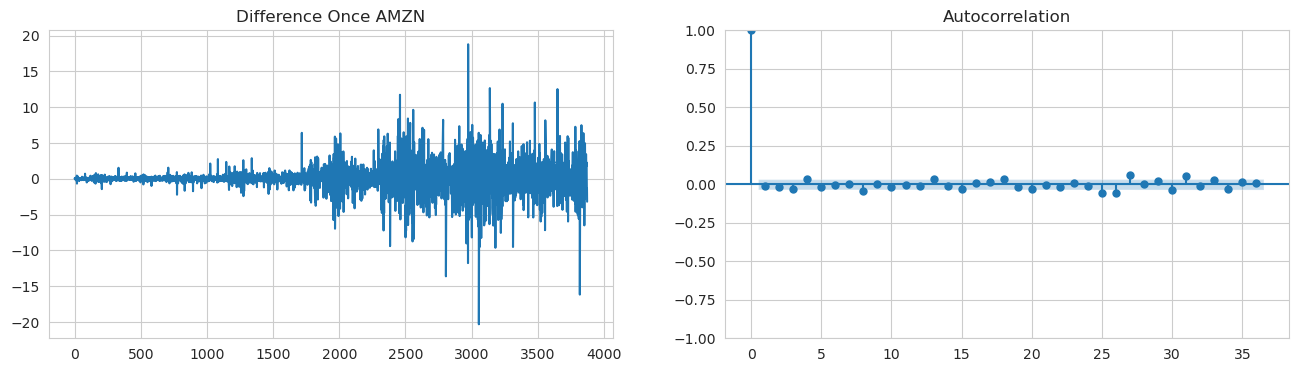

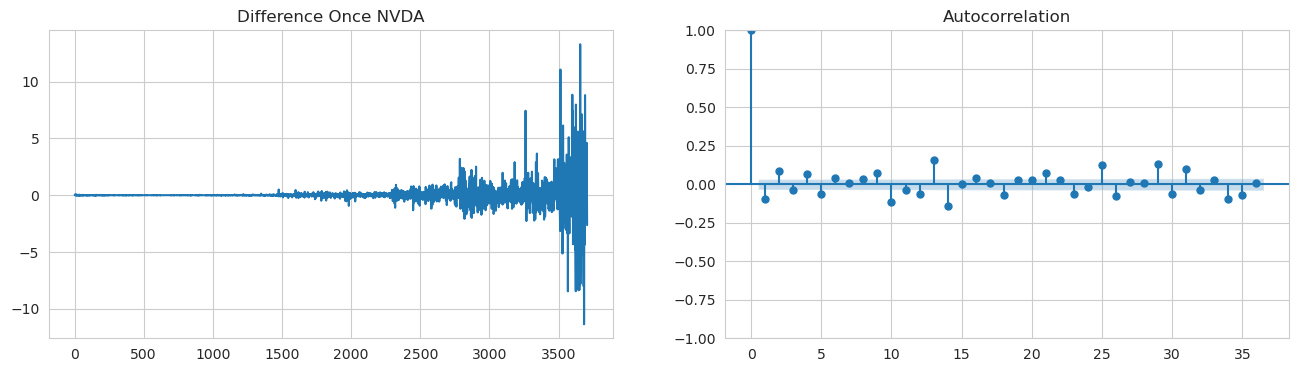

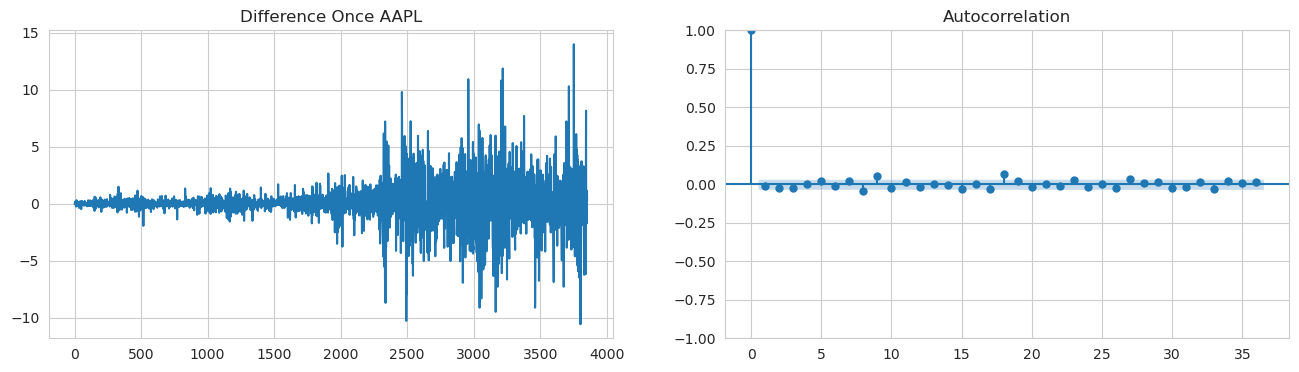

In [10]:
for i in range(len(df)):
    diff1 = df[i].Close.diff().dropna()
    
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
    ax1.plot(diff1)
    ax1.set_title(f"Difference Once {stock_symbols[i]}")
    plot_acf(diff1, ax=ax2);

In [11]:
ndif = [ndiffs(df[i].Close, test="adf") for i in range(len(df))]
print("ndif", ndif)

ndif [1, 1, 1, 1, 1]


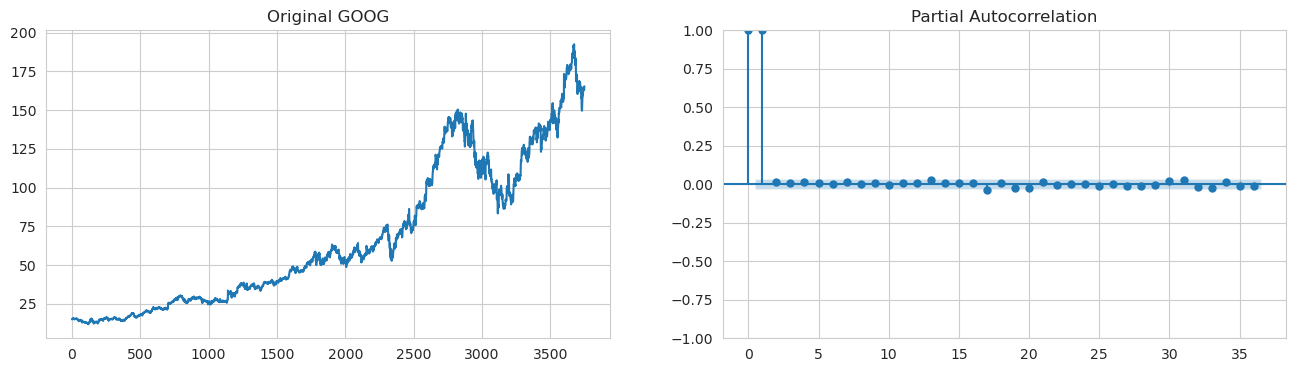

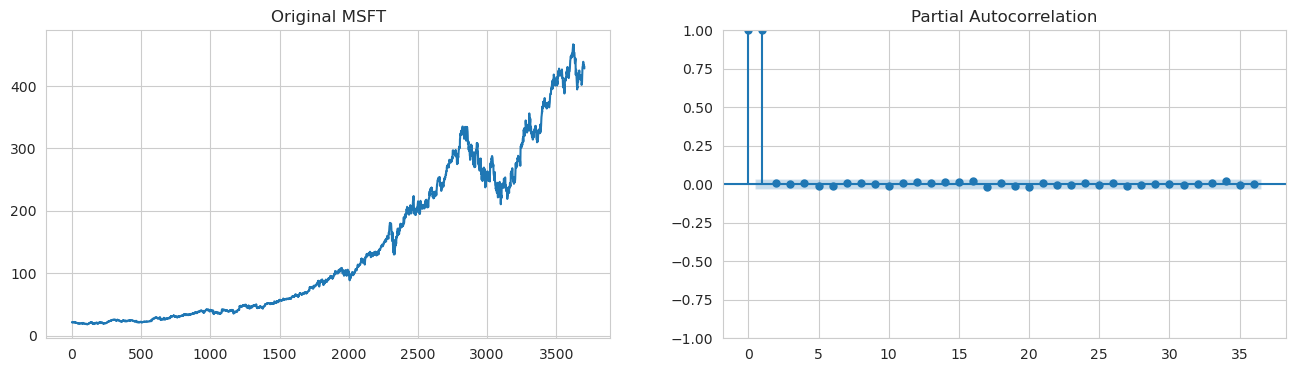

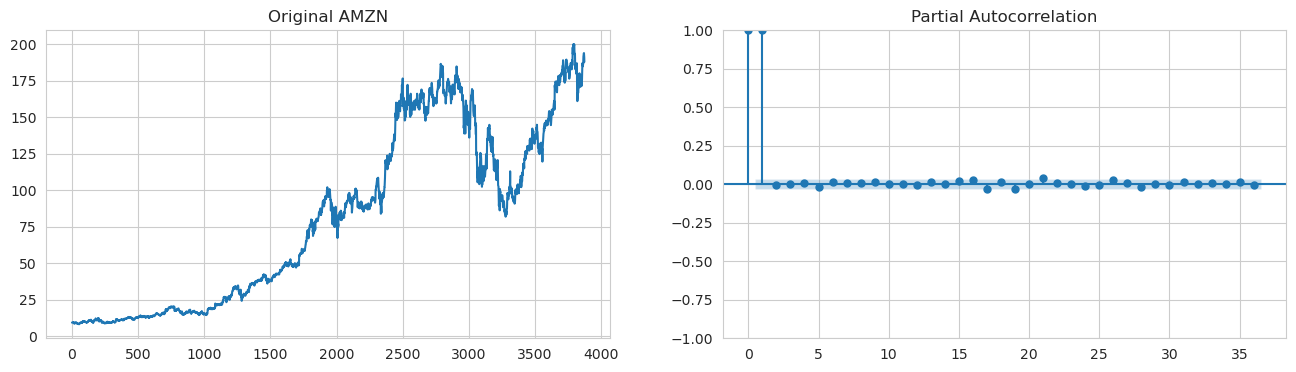

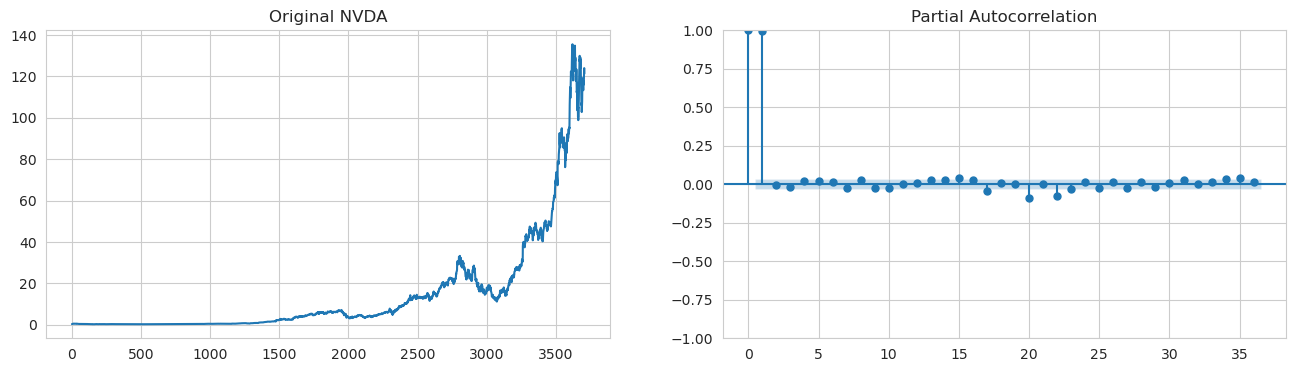

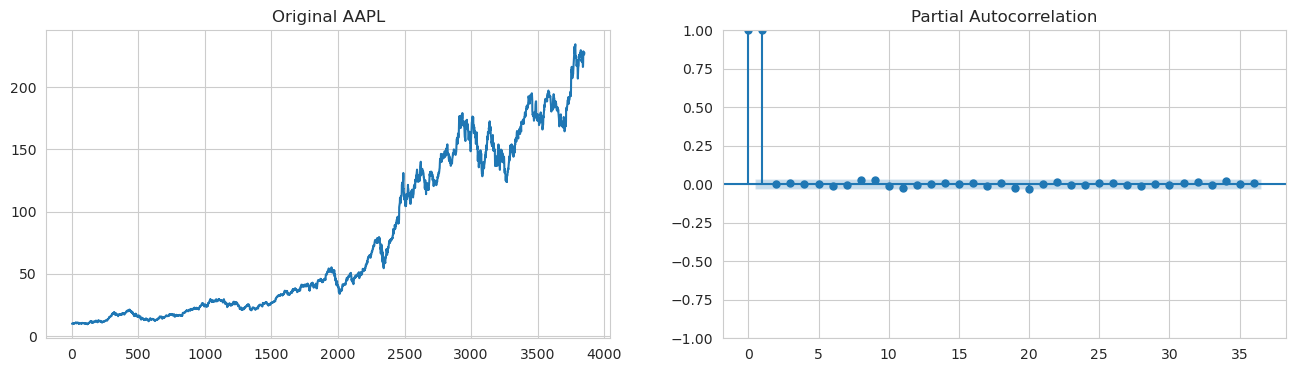

In [12]:
for i in range(len(df)):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
    ax1.plot(df[i].Close)
    ax1.set_title(f"Original {stock_symbols[i]}")
    plot_pacf(df[i].Close, ax=ax2);

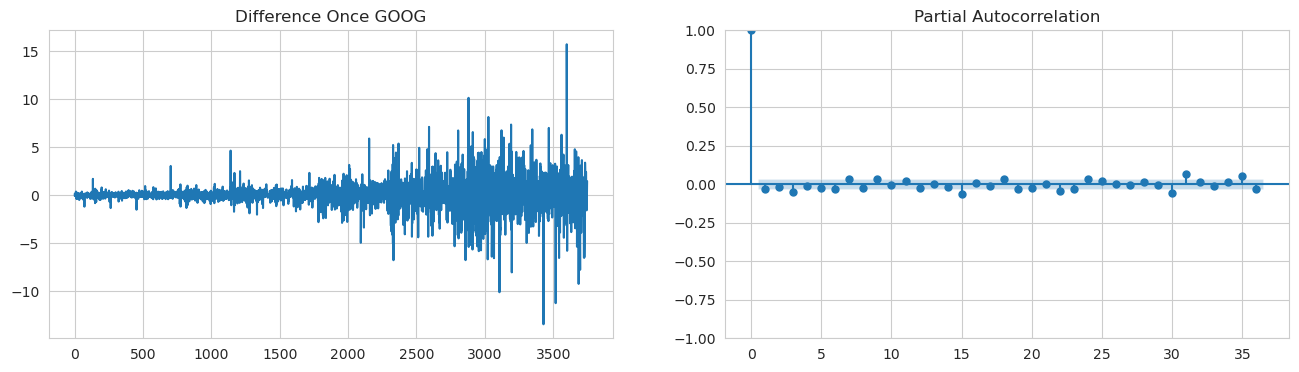

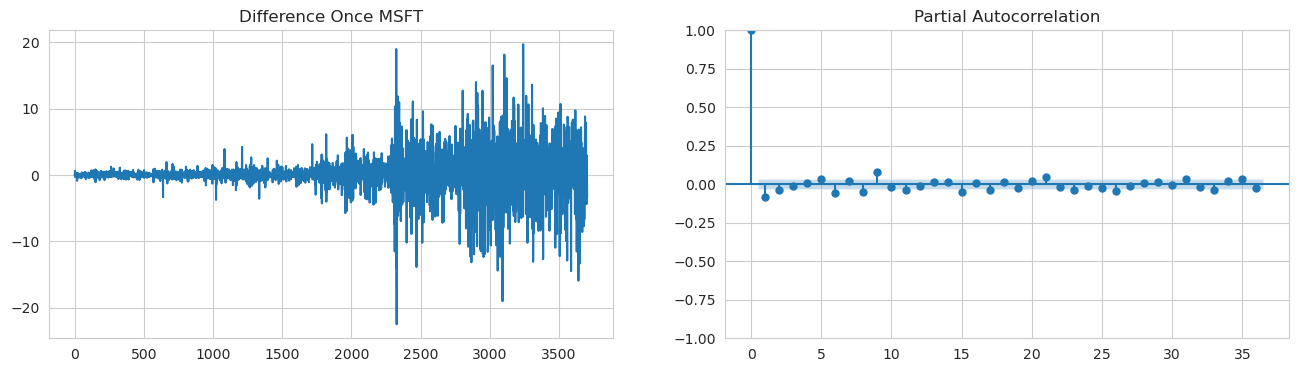

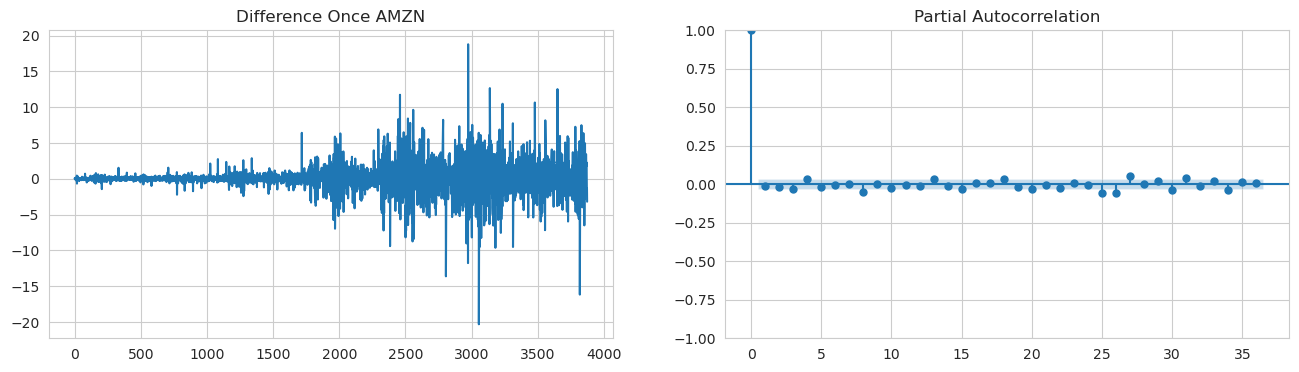

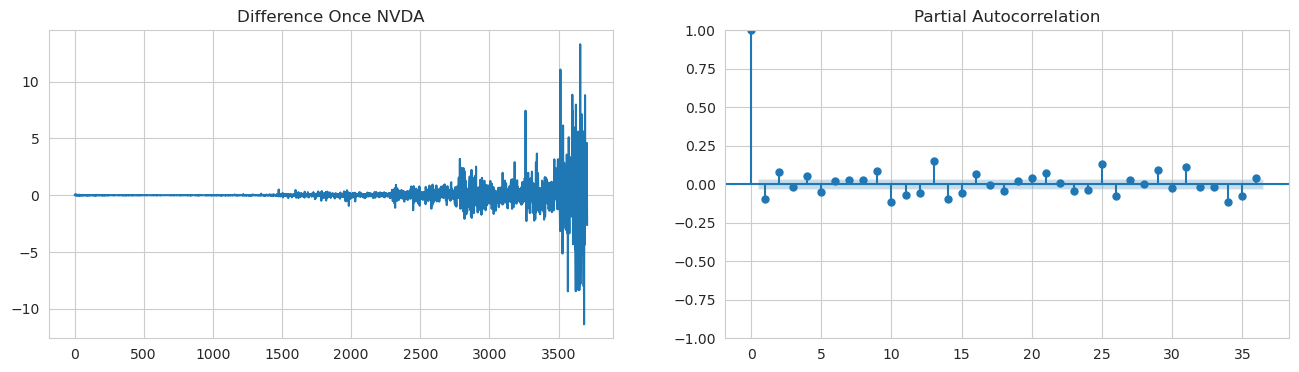

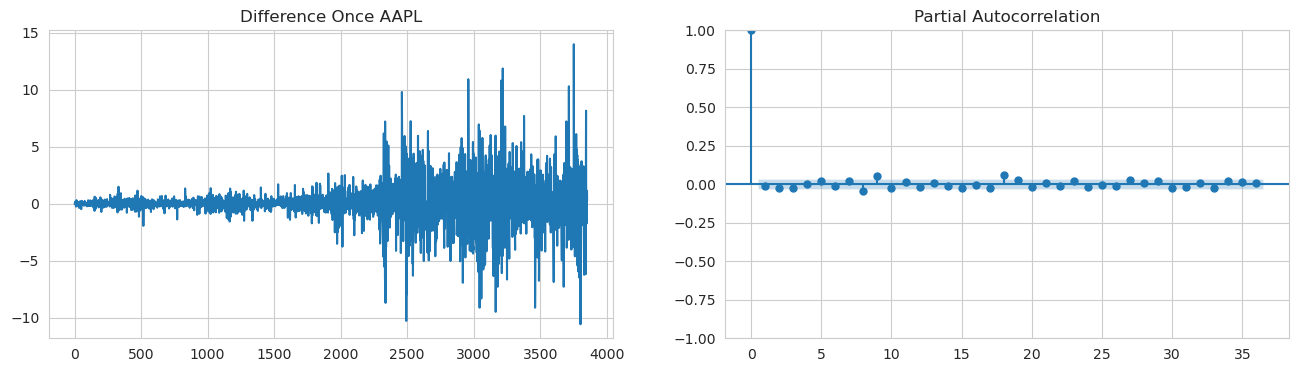

In [13]:
for i in range(len(df)):
    diff1 = df[i].Close.diff().dropna()

    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
    ax1.plot(diff1)
    ax1.set_title(f"Difference Once {stock_symbols[i]}")
    plot_pacf(diff1, ax=ax2);

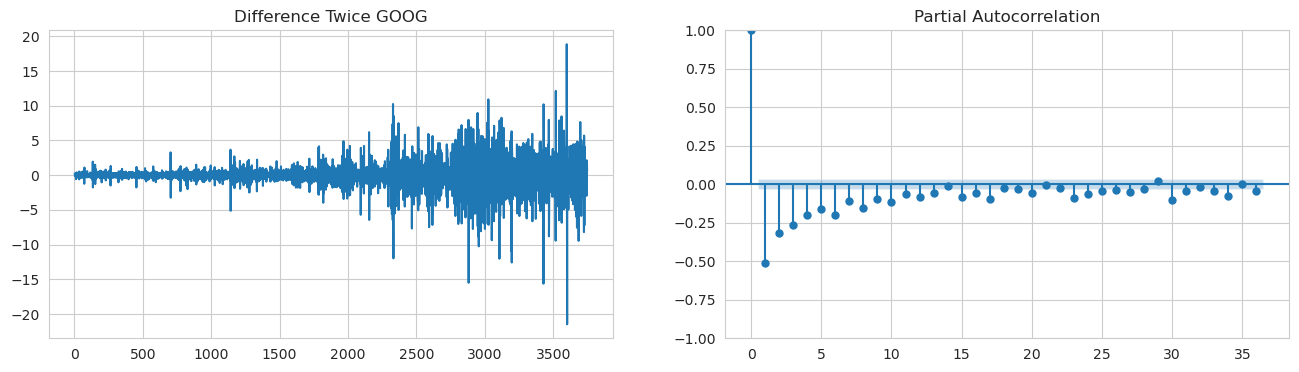

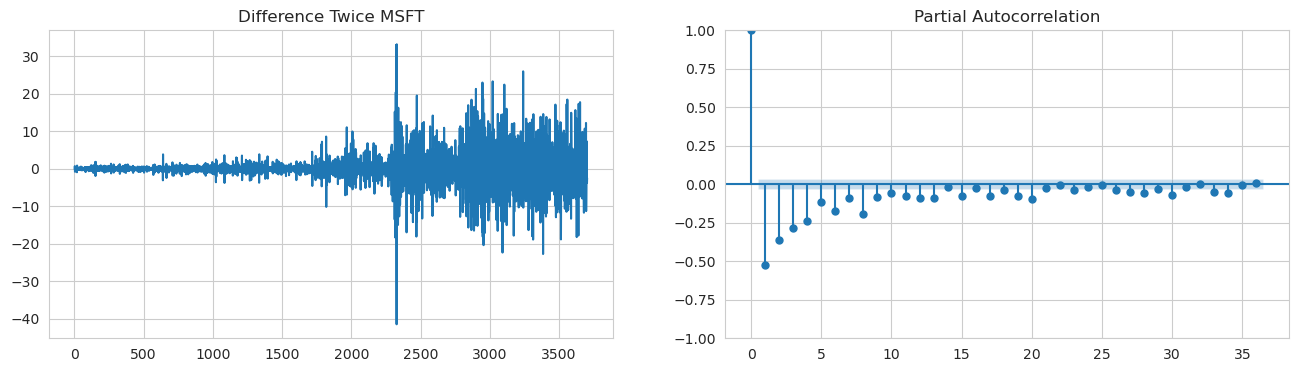

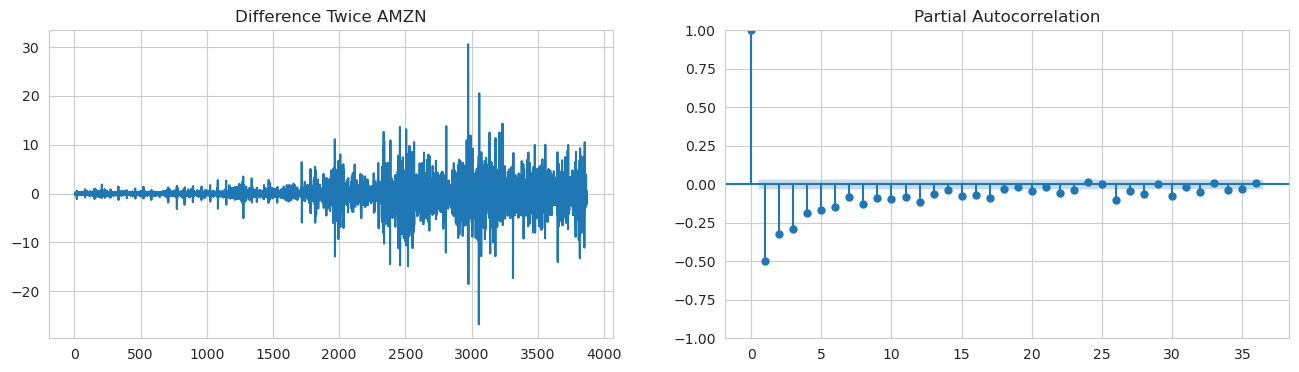

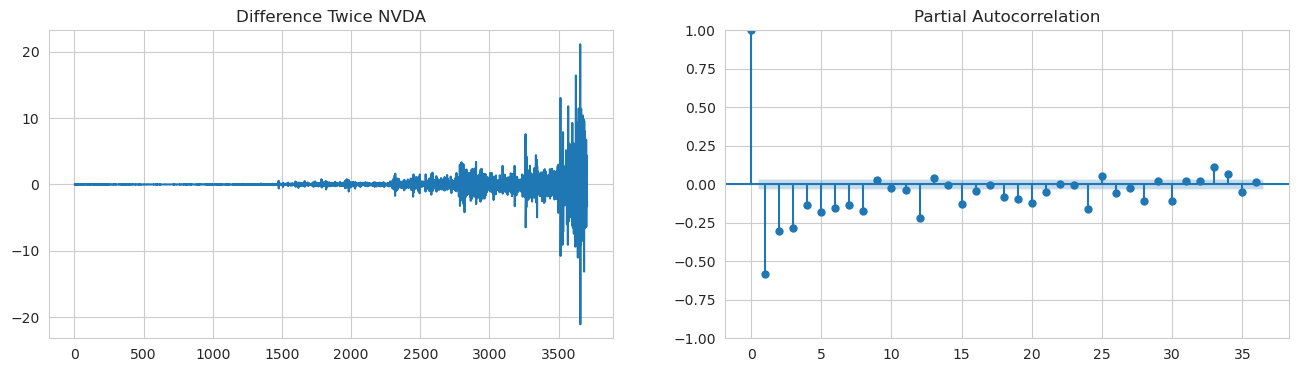

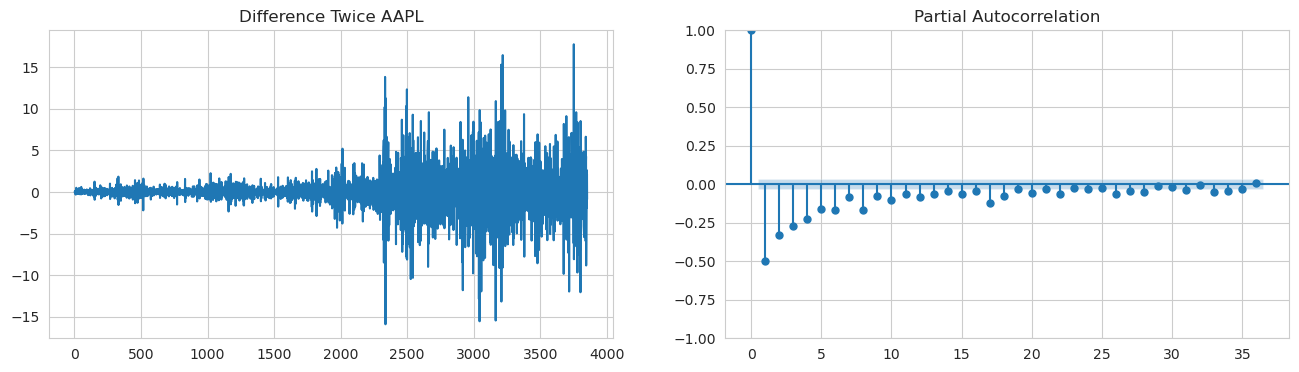

In [14]:
for i in range(len(df)):
    diff2 = df[i].Close.diff().diff().dropna()
    
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
    ax1.plot(diff2)
    ax1.set_title(f"Difference Twice {stock_symbols[i]}")
    plot_pacf(diff2, ax=ax2);

In [16]:
# orderr = auto_arima(df[0].Close, trace=True).get_params().get("order")
# print(orderr)

In [18]:
arima_order = {}
for i in range(len(df)):
    print(f"Stock name: {stock_symbols[i]}")
    arima_order[i] = auto_arima(df[i].Close, trace=True).get_params().get("order")
    print(f"ARIMA Order for {stock_symbols[i]}: {arima_order[i]}")

Stock name: GOOG
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=6.88 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12156.413, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12154.912, Time=0.35 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12154.797, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12157.727, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12156.168, Time=2.31 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=12155.779, Time=0.63 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12150.697, Time=2.08 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=12150.076, Time=2.64 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=12149.251, Time=0.81 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=12151.027, Time=1.00 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=12149.240, Time=5.69 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=12151.053, Time=5.64 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=12151.368, Time=4.15 sec
 ARIMA(0

In [19]:
arima_result = {}
for i in range(len(df)):
    arima_result[i] = sm.ARIMA(df[i].Close, order=arima_order[i]).fit()
    print(f"\n ARIMA Results for {stock_symbols[i]}:\n {arima_result[i].summary()}")

/home/hirak/anaconda3/envs/SIGNS_2024/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/hirak/anaconda3/envs/SIGNS_2024/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/hirak/anaconda3/envs/SIGNS_2024/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)



 ARIMA Results for GOOG:
                                SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3457
Model:                 ARIMA(1, 1, 4)   Log Likelihood               -6069.695
Date:                Sun, 17 Nov 2024   AIC                          12151.391
Time:                        13:50:34   BIC                          12188.278
Sample:                             0   HQIC                         12164.564
                               - 3457                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9536      0.025    -37.670      0.000      -1.003      -0.904
ma.L1          0.9223      0.026     36.005      0.000       0.872       0.972
ma.L2         -0.0490    

/home/hirak/anaconda3/envs/SIGNS_2024/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/hirak/anaconda3/envs/SIGNS_2024/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/hirak/anaconda3/envs/SIGNS_2024/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)



 ARIMA Results for MSFT:
                                SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3457
Model:                 ARIMA(5, 2, 0)   Log Likelihood               -8859.393
Date:                Sun, 17 Nov 2024   AIC                          17730.787
Time:                        13:50:35   BIC                          17767.672
Sample:                             0   HQIC                         17743.960
                               - 3457                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9110      0.009   -100.846      0.000      -0.929      -0.893
ar.L2         -0.7546      0.013    -58.630      0.000      -0.780      -0.729
ar.L3         -0.5605    

/home/hirak/anaconda3/envs/SIGNS_2024/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/hirak/anaconda3/envs/SIGNS_2024/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/hirak/anaconda3/envs/SIGNS_2024/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)



 ARIMA Results for AMZN:
                                SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3457
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -7184.678
Date:                Sun, 17 Nov 2024   AIC                          14381.355
Time:                        13:50:39   BIC                          14418.243
Sample:                             0   HQIC                         14394.528
                               - 3457                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0996      0.017    -65.609      0.000      -1.132      -1.067
ar.L2         -0.9381      0.018    -52.497      0.000      -0.973      -0.903
ma.L1          1.0905    

/home/hirak/anaconda3/envs/SIGNS_2024/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/hirak/anaconda3/envs/SIGNS_2024/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/hirak/anaconda3/envs/SIGNS_2024/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)



 ARIMA Results for NVDA:
                                SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3457
Model:                 ARIMA(5, 2, 0)   Log Likelihood               -4872.944
Date:                Sun, 17 Nov 2024   AIC                           9757.889
Time:                        13:50:39   BIC                           9794.774
Sample:                             0   HQIC                          9771.061
                               - 3457                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9211      0.005   -186.692      0.000      -0.931      -0.911
ar.L2         -0.6837      0.006   -113.965      0.000      -0.695      -0.672
ar.L3         -0.5286    

/home/hirak/anaconda3/envs/SIGNS_2024/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/hirak/anaconda3/envs/SIGNS_2024/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/hirak/anaconda3/envs/SIGNS_2024/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [19]:
# result.forecast(10)
# residuals = pd.DataFrame(result.resid)

In [20]:
# fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
# ax1.plot(pd.DataFrame(result.resid))
# ax2.hist(pd.DataFrame(result.resid), density=True)


 ARIMA Residuals for GOOG:


 ARIMA Residuals for MSFT:


 ARIMA Residuals for AMZN:


 ARIMA Residuals for NVDA:


 ARIMA Residuals for AAPL:



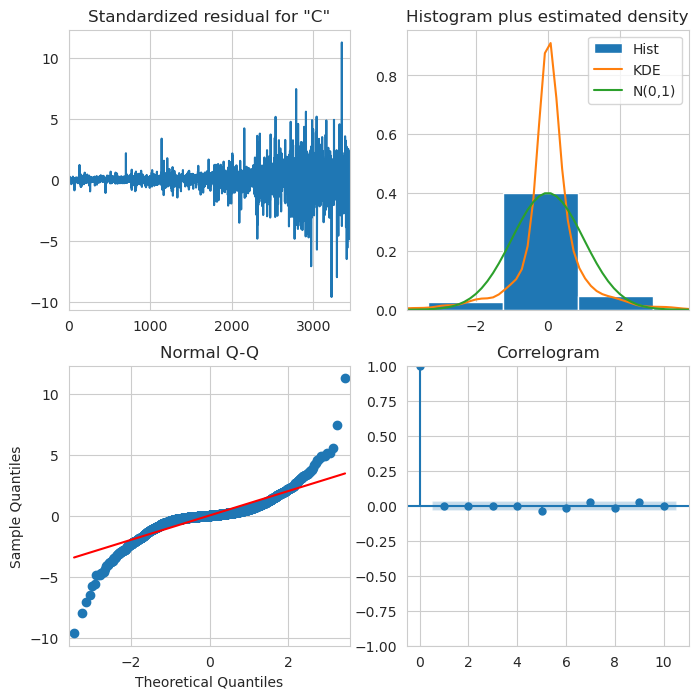

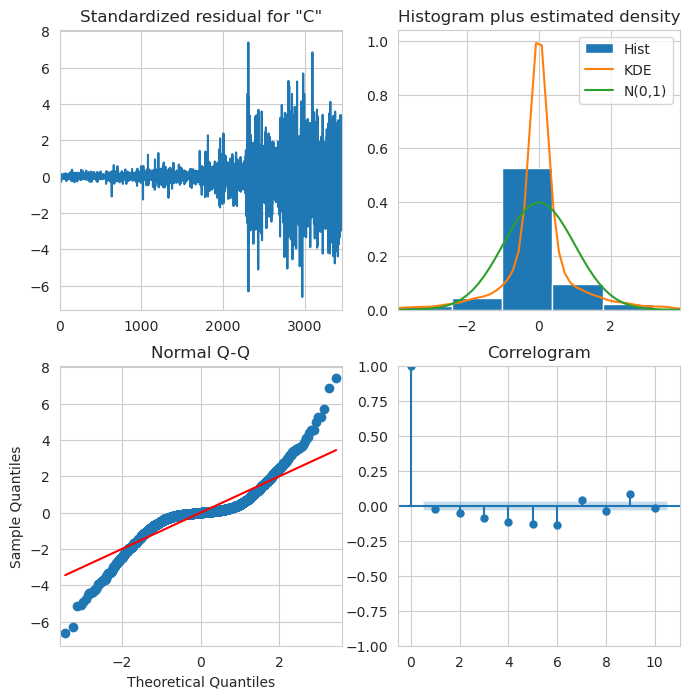

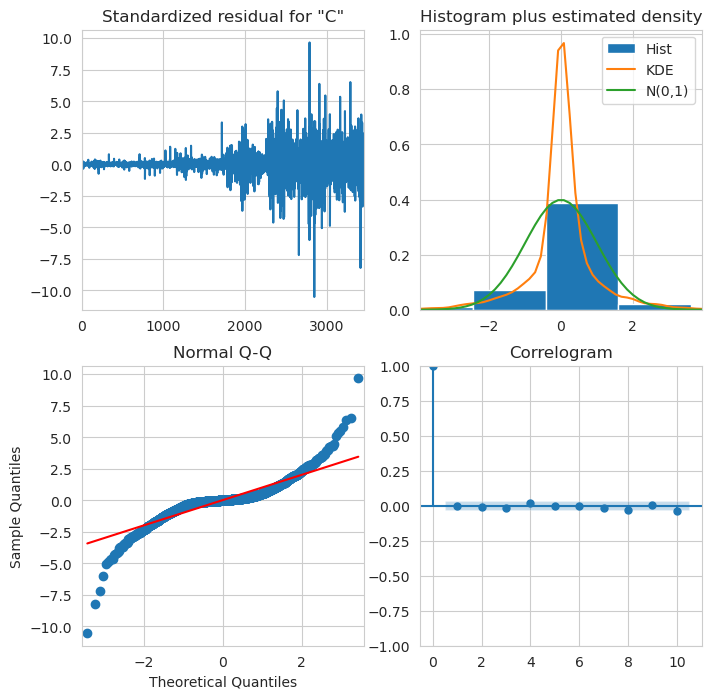

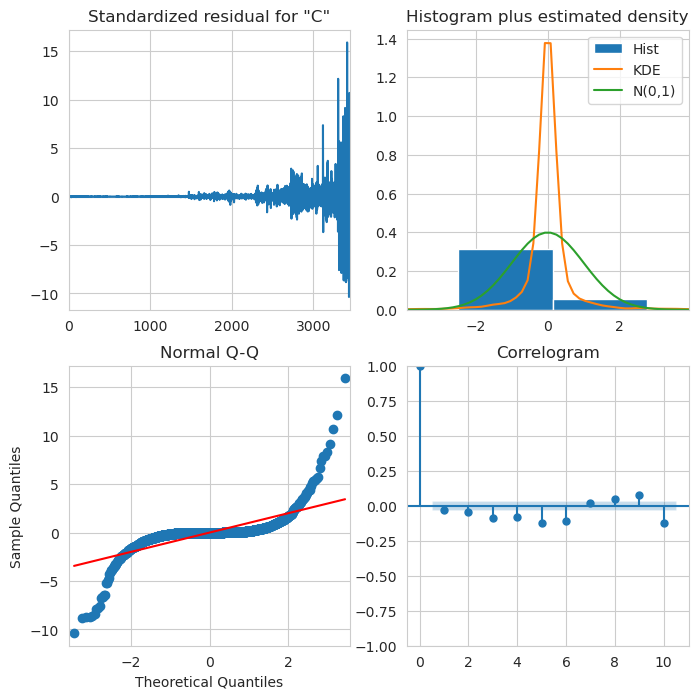

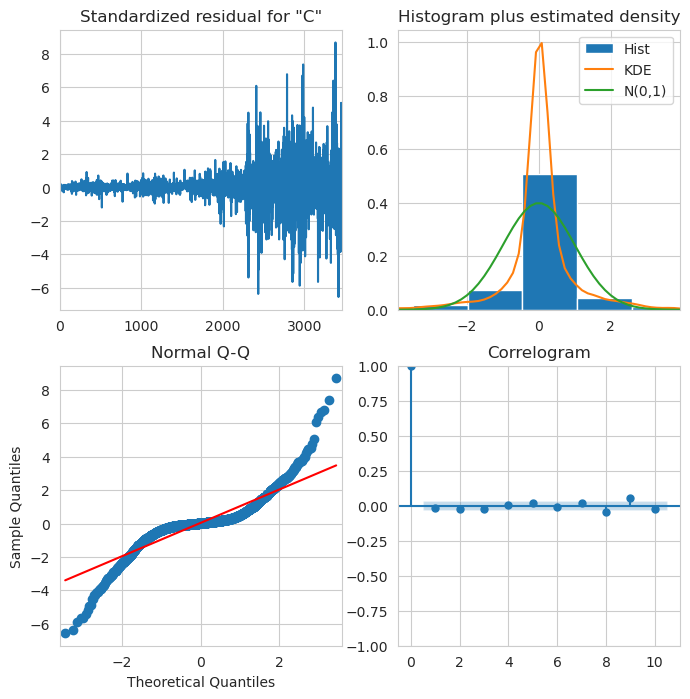

In [26]:
for i in range(len(df)):
    arima_result[i].plot_diagnostics(figsize = (8,8))
    print(f"\n ARIMA Residuals for {stock_symbols[i]}:\n")


 Last 100 days stock Closing price for GOOG


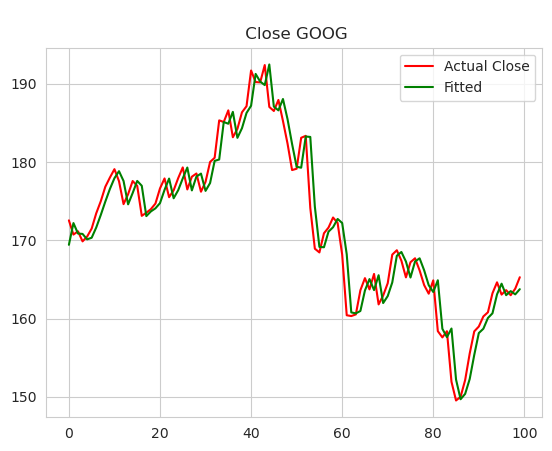


 Last 100 days stock Closing price for MSFT


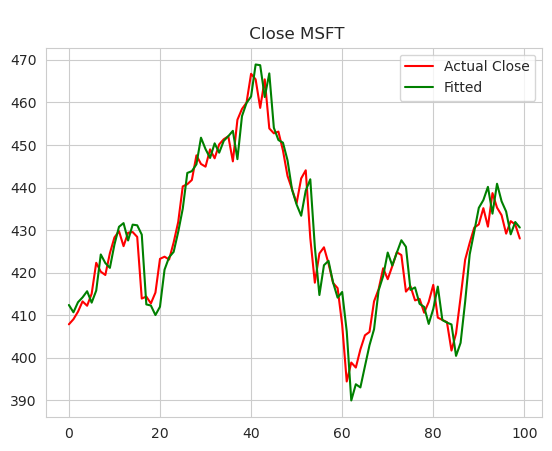


 Last 100 days stock Closing price for AMZN


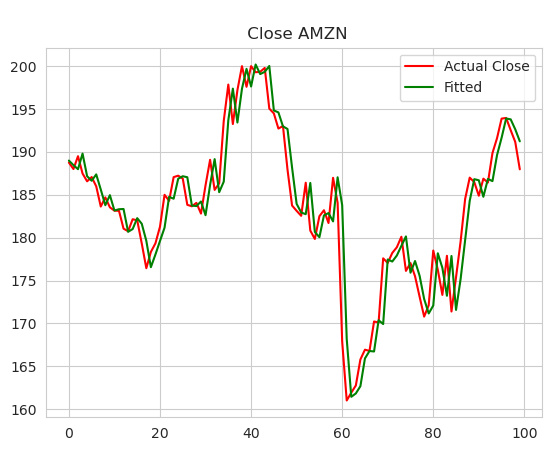


 Last 100 days stock Closing price for NVDA


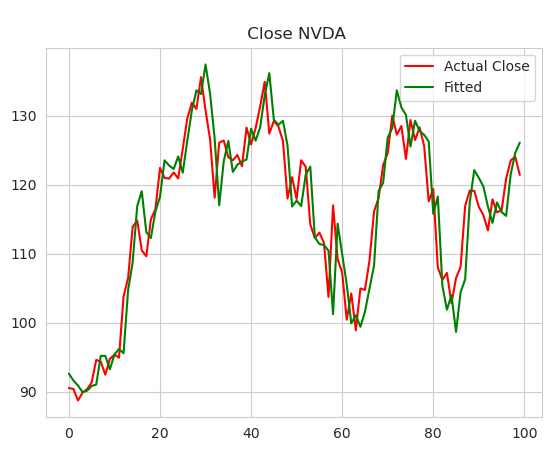


 Last 100 days stock Closing price for AAPL


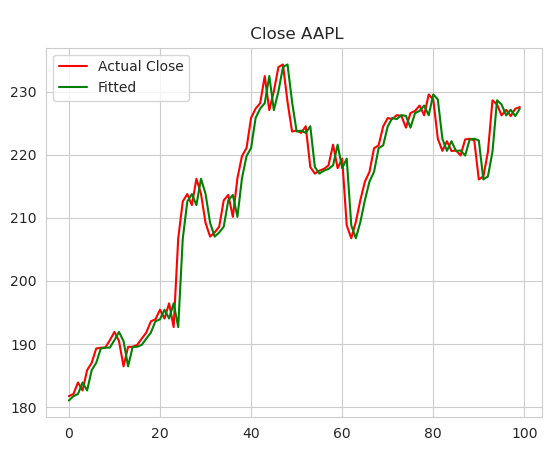

In [31]:
for i in range(len(df)):
    print(f"\n Last 100 days stock Closing price for {stock_symbols[i]}")
    plt.plot(range(100), df[i].Close[(len(df[i])-100):], color='r', label='Actual Close')
    plt.plot(range(100), arima_result[i].fittedvalues[(len(df[i])-100):], color='g', label='Fitted')
    plt.legend()
    plt.title(f"\n Close {stock_symbols[i]}")
    plt.show()

In [87]:
train = {}
test = {}
train_exo = {}
test_exo = {}
df_train = [df[i]["Close"].copy() for i in range(len(df))]
df_exo = [df[i]["weighted compound sentiment score"].copy() for i in range(len(df))]
for i in range(len(df)):
    n = 0
    n = int(len(df[i])*0.95)
    train[i] = df_train[i][:n]
    test[i] = df_train[i][n:]
    train_exo[i] = df_exo[i][:n]
    test_exo[i] = df_exo[i][n:]
    print(len(train[i]), len(test[i]))

3284 173
3284 173
3284 173
3284 173
3284 173


In [88]:
train_exo[0]

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
3505    0.051600
3506   -0.081280
3507   -0.316217
3508    0.204150
3511    0.141867
Name: weighted compound sentiment score, Length: 3284, dtype: float64

In [76]:
test[0]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,weighted positive sentiment score,weighted negative sentiment score,weighted neutral sentiment score,weighted compound sentiment score
3512,2024-01-23,147.358126,148.495332,146.829425,148.315765,14113600.0,0.0,0.0,0.420000,0.145000,0.743850,0.144400
3513,2024-01-24,149.921808,151.198687,149.472914,149.981674,19245000.0,0.0,0.0,0.252000,0.174000,0.788933,0.175600
3514,2024-01-25,151.368272,154.380862,150.849541,153.263611,21495100.0,0.0,0.0,0.290980,0.000000,0.834458,0.435154
3515,2024-01-26,152.495494,153.732462,152.425674,153.413239,19494500.0,0.0,0.0,0.000000,0.143000,0.934006,-0.458800
3516,2024-01-29,153.263621,154.819797,152.545383,154.460678,20909300.0,0.0,0.0,0.291880,0.278040,0.637985,-0.159267
...,...,...,...,...,...,...,...,...,...,...,...,...
3744,2024-09-23,165.339996,166.610001,162.949997,163.070007,15648400.0,0.0,0.0,0.271893,0.143219,0.876131,0.442796
3745,2024-09-24,164.250000,164.550003,162.029999,163.639999,18774100.0,0.0,0.0,0.234960,0.000000,0.947190,0.434495
3746,2024-09-25,162.970001,164.216995,162.774994,162.990005,13607900.0,0.0,0.0,0.280401,0.221801,0.834126,-0.162535
3747,2024-09-26,165.029999,165.500000,163.500000,163.830002,18234500.0,0.0,0.0,0.156502,0.180008,0.878406,-0.158908


In [33]:
for i in range(len(df_train)):
    result = adfuller(train[i].Close.dropna())
    print(f"For {stock_symbols[i]}")
    print(f'ADF statistic: {result[0]}')
    print(f'p-value: {result[1]}')

For GOOG
ADF statistic: 0.8057692219906695
p-value: 0.9917287256210615
For MSFT
ADF statistic: 1.9674795933945943
p-value: 0.9986291745790218
For AMZN
ADF statistic: -0.4188681163062788
p-value: 0.9069004931779543
For NVDA
ADF statistic: 3.248264846279832
p-value: 1.0
For AAPL
ADF statistic: 0.8248016524198261
p-value: 0.99202614624519


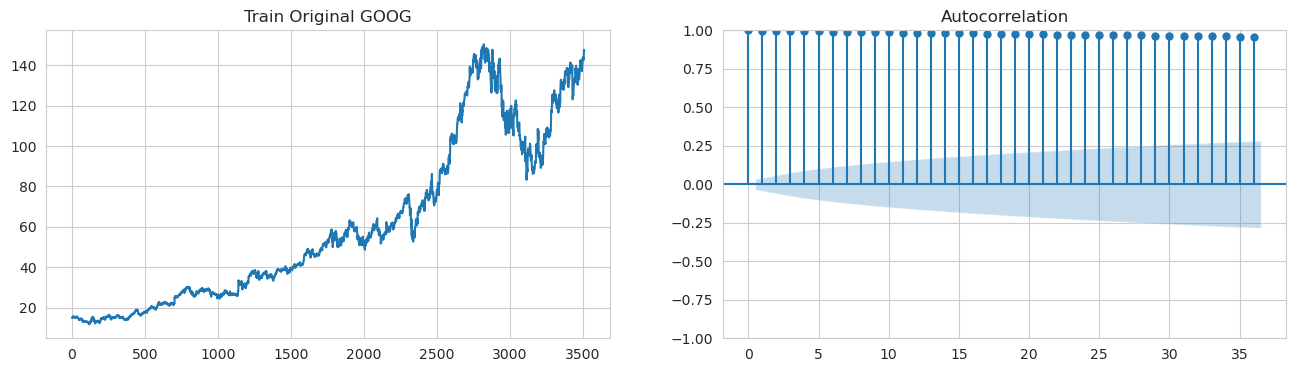

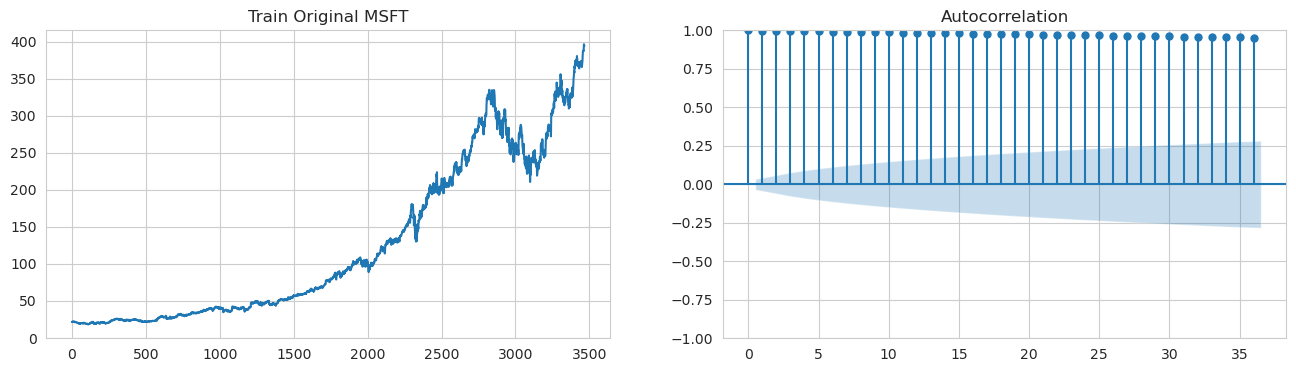

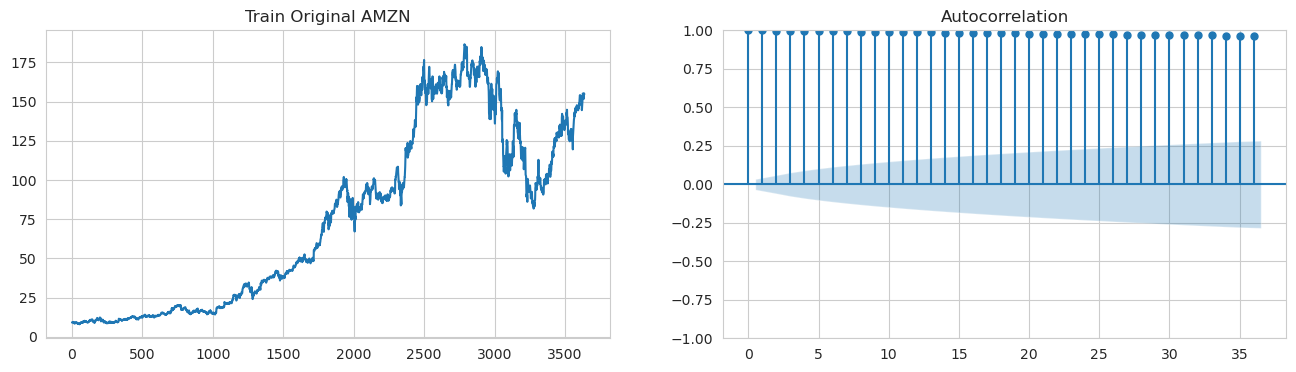

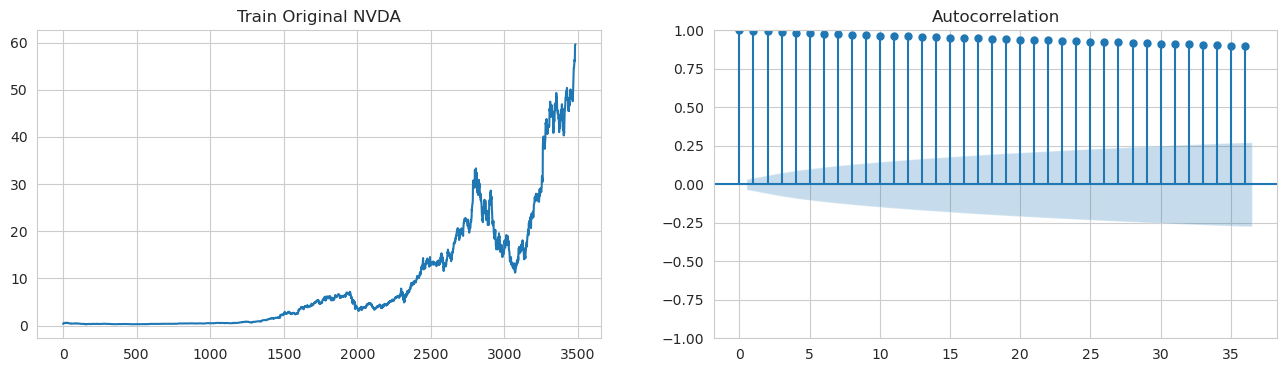

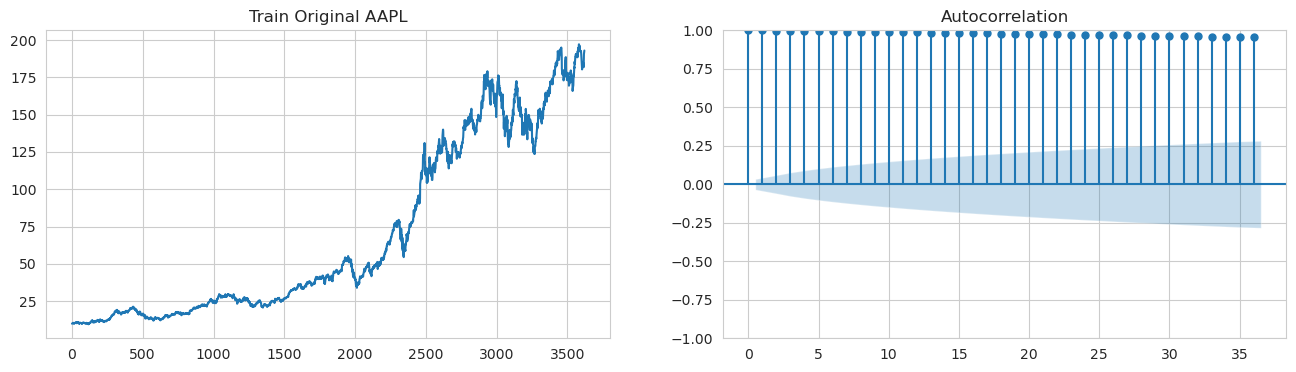

In [91]:
for i in range(len(df_train)):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
    ax1.plot(train[i])
    ax1.set_title(f"Train Original {stock_symbols[i]}")
    plot_acf(train[i], ax=ax2);

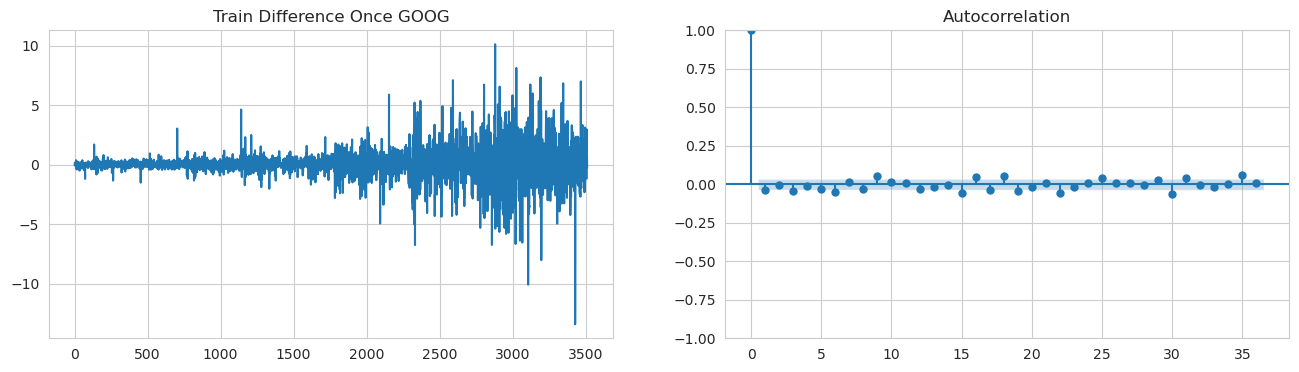

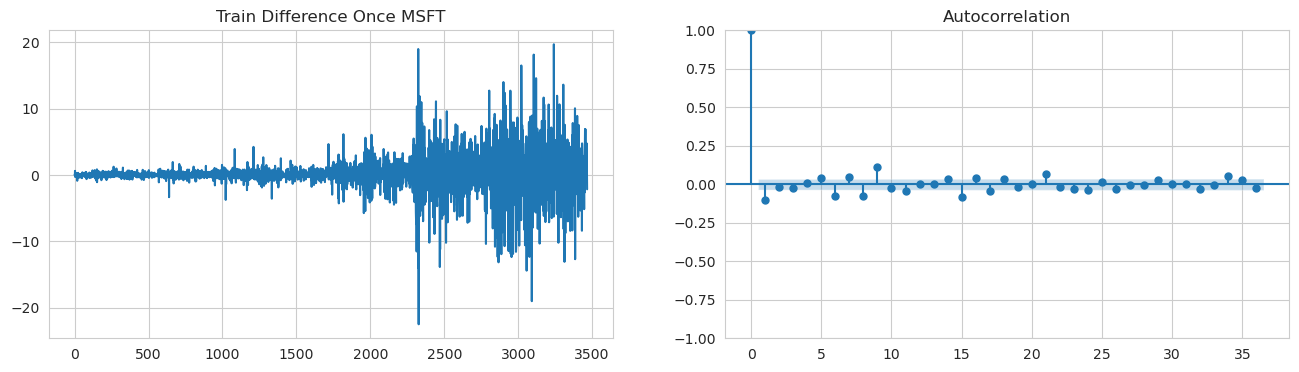

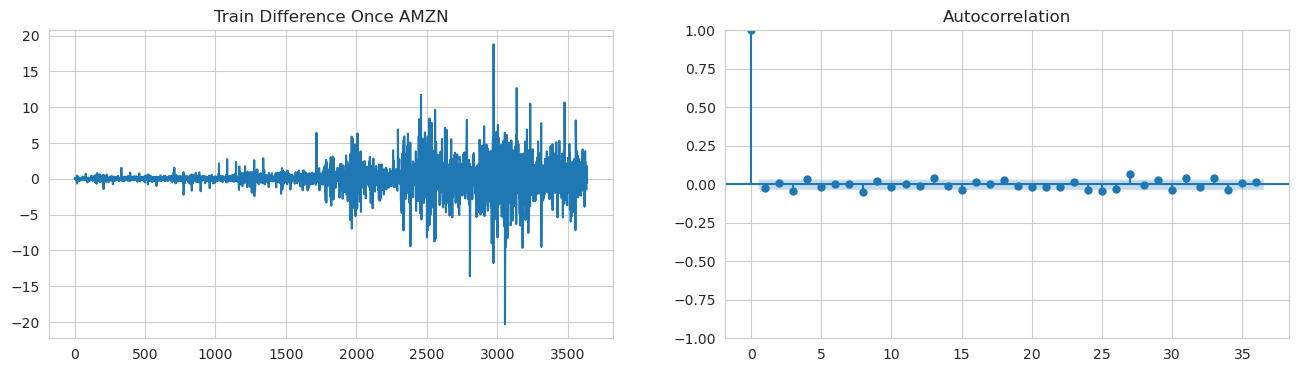

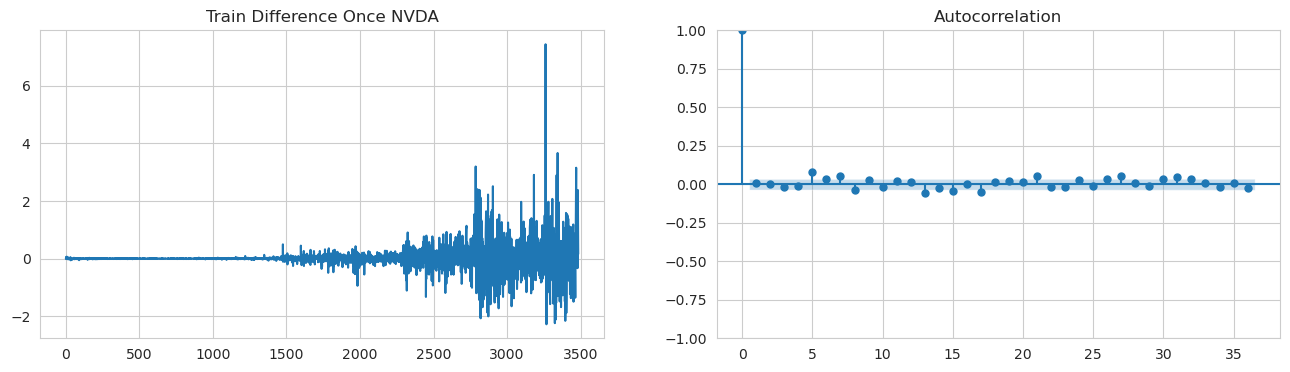

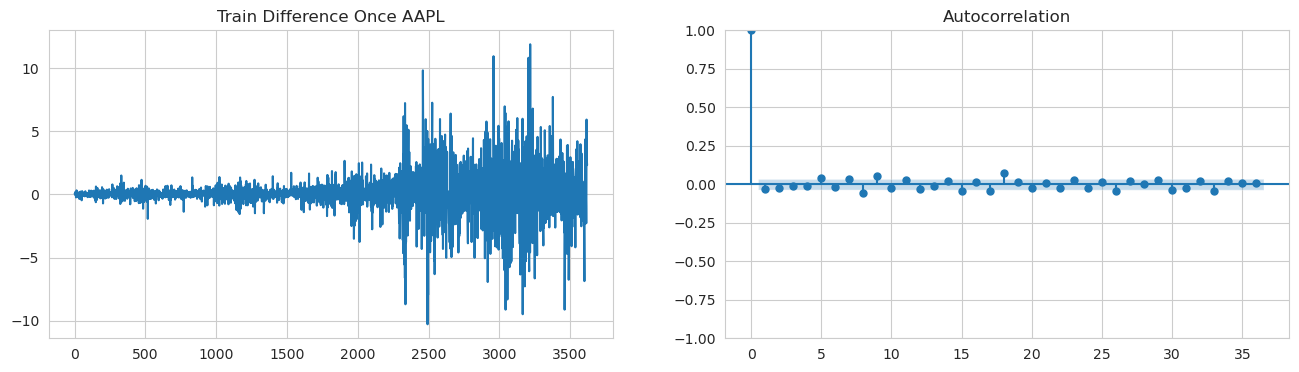

In [92]:
for i in range(len(df_train)):
    diff1 = train[i].diff().dropna()
    
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
    ax1.plot(diff1)
    ax1.set_title(f"Train Difference Once {stock_symbols[i]}")
    plot_acf(diff1, ax=ax2);

In [93]:
ndif_train = [ndiffs(train[i], test="adf") for i in range(len(df))]
print("ndif_train", ndif_train)

ndif_train [1, 1, 1, 1, 1]


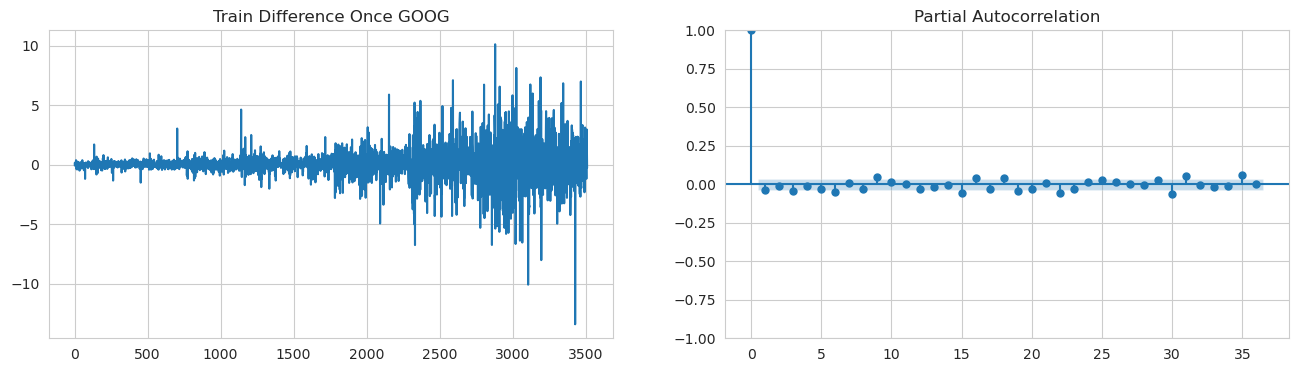

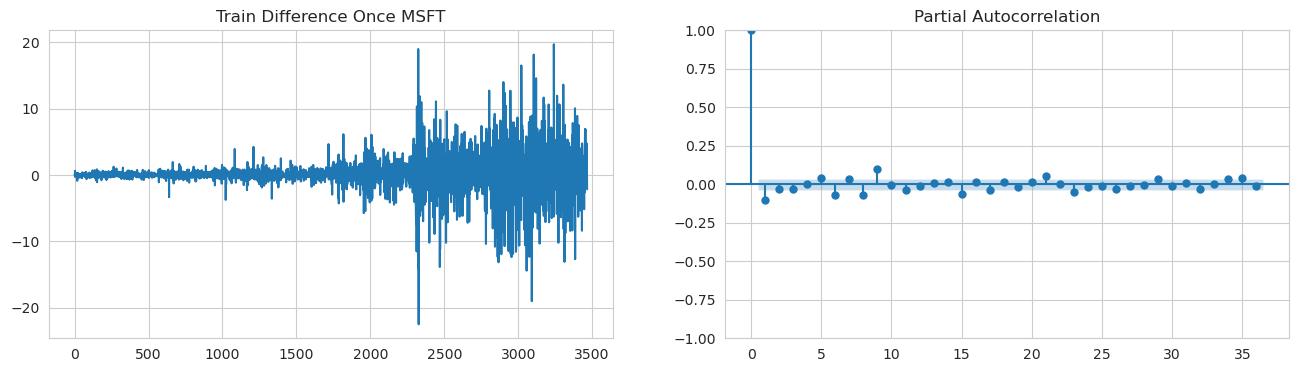

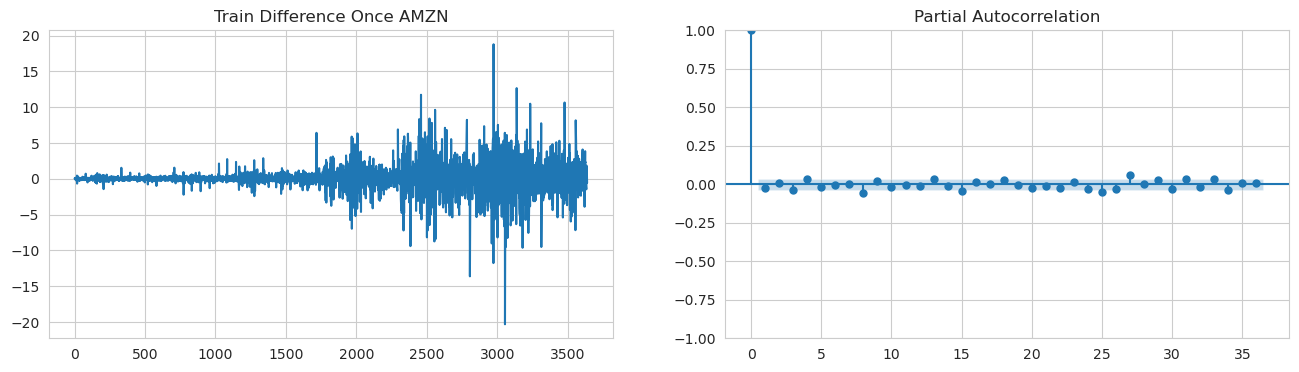

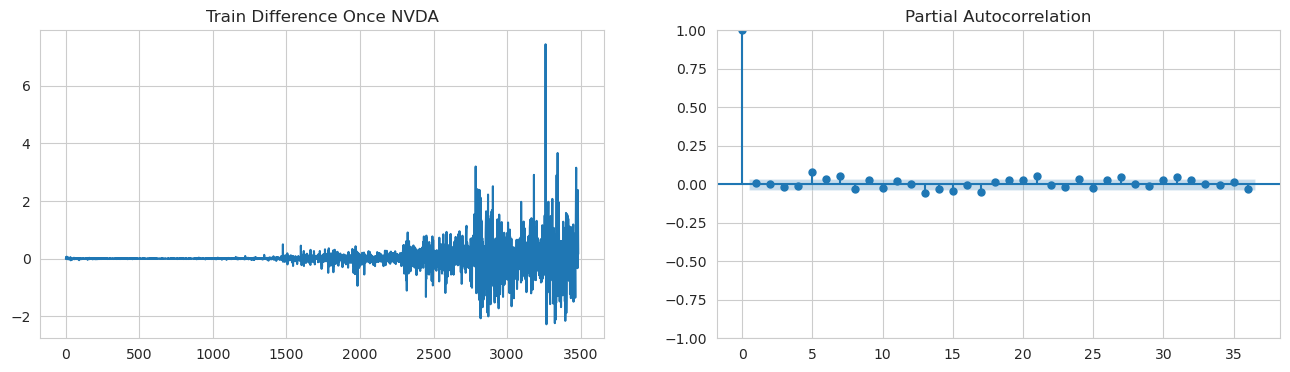

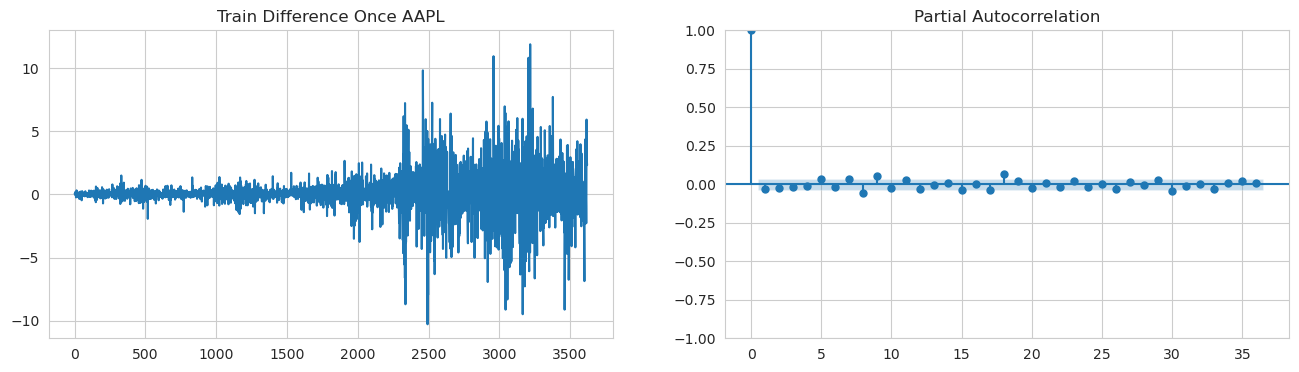

In [94]:
for i in range(len(df_train)):
    diff1 = train[i].diff().dropna() 
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
    ax1.plot(diff1)
    ax1.set_title(f"Train Difference Once {stock_symbols[i]}")
    plot_pacf(diff1, ax=ax2);

In [95]:
arima_order_train = {}
arima_model_train = {}
for i in range(len(df)):
    print(f"Stock name: {stock_symbols[i]}")
    arima_model_train[i] = auto_arima(train[i], trace=True, exogenous=train_exo[i])
    arima_order_train[i] = auto_arima(train[i], trace=True).get_params().get("order")
    print(f"Training Set ARIMA Order for {stock_symbols[i]}: {arima_order_train[i]}")

Stock name: GOOG
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10958.508, Time=4.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10965.773, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10963.895, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10963.819, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10967.003, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10957.341, Time=2.45 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=10965.439, Time=0.55 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10955.389, Time=2.28 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10957.339, Time=2.70 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=10965.645, Time=0.44 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=10958.601, Time=0.65 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 14.366 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10958.508, Time=4.04 sec
 ARIMA(0,1,0)(0

In [40]:
arima_result_train = {}
for i in range(len(df)):
    arima_result_train[i] = sm.ARIMA(train[i].Close, order=arima_order_train[i]).fit()
    print(f"\n Training Set ARIMA Results for {stock_symbols[i]}:\n {arima_result_train[i].summary()}")

/home/hirak/anaconda3/envs/SIGNS_2024/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/hirak/anaconda3/envs/SIGNS_2024/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/hirak/anaconda3/envs/SIGNS_2024/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)



 Training Set ARIMA Results for GOOG:
                                SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3284
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5476.301
Date:                Sun, 17 Nov 2024   AIC                          10958.601
Time:                        14:57:45   BIC                          10976.891
Sample:                             0   HQIC                         10965.150
                               - 3284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8313      0.046     18.246      0.000       0.742       0.921
ma.L1         -0.8656      0.041    -20.915      0.000      -0.947      -0.784
sigma2      

/home/hirak/anaconda3/envs/SIGNS_2024/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/hirak/anaconda3/envs/SIGNS_2024/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/hirak/anaconda3/envs/SIGNS_2024/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)



 Training Set ARIMA Results for MSFT:
                                SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3284
Model:                 ARIMA(5, 2, 0)   Log Likelihood               -8214.075
Date:                Sun, 17 Nov 2024   AIC                          16440.150
Time:                        14:57:46   BIC                          16476.727
Sample:                             0   HQIC                         16453.246
                               - 3284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9217      0.009   -104.577      0.000      -0.939      -0.904
ar.L2         -0.7462      0.013    -58.293      0.000      -0.771      -0.721
ar.L3       

/home/hirak/anaconda3/envs/SIGNS_2024/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/hirak/anaconda3/envs/SIGNS_2024/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/hirak/anaconda3/envs/SIGNS_2024/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)



 Training Set ARIMA Results for AMZN:
                                SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3284
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6684.335
Date:                Sun, 17 Nov 2024   AIC                          13374.669
Time:                        14:57:47   BIC                          13392.959
Sample:                             0   HQIC                         13381.218
                               - 3284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6953      0.122     -5.695      0.000      -0.935      -0.456
ma.L1          0.6666      0.126      5.276      0.000       0.419       0.914
sigma2      

/home/hirak/anaconda3/envs/SIGNS_2024/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/hirak/anaconda3/envs/SIGNS_2024/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/hirak/anaconda3/envs/SIGNS_2024/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)



 Training Set ARIMA Results for NVDA:
                                SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3284
Model:                 ARIMA(5, 2, 0)   Log Likelihood               -1977.897
Date:                Sun, 17 Nov 2024   AIC                           3967.794
Time:                        14:57:48   BIC                           4004.371
Sample:                             0   HQIC                          3980.891
                               - 3284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8529      0.009   -100.310      0.000      -0.870      -0.836
ar.L2         -0.6936      0.010    -66.731      0.000      -0.714      -0.673
ar.L3       

/home/hirak/anaconda3/envs/SIGNS_2024/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/hirak/anaconda3/envs/SIGNS_2024/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/hirak/anaconda3/envs/SIGNS_2024/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)



 Training Set ARIMA Results for AAPL:
                                SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3284
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -5975.341
Date:                Sun, 17 Nov 2024   AIC                          11960.682
Time:                        14:57:53   BIC                          11991.164
Sample:                             0   HQIC                         11971.596
                               - 3284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8614      0.005   -390.727      0.000      -1.871      -1.852
ar.L2         -0.9775      0.005   -209.453      0.000      -0.987      -0.968
ma.L1       

In [41]:
# step=[len(test[i]) for i in range(len(df))]
step=[30 for i in range(len(df))]
step

[30, 30, 30, 30, 30]

In [71]:
train[0]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,weighted positive sentiment score,weighted negative sentiment score,weighted neutral sentiment score,weighted compound sentiment score
0,2011-01-03,14.819920,15.046263,14.819920,15.015455,94962614.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000
1,2011-01-04,15.047010,15.060922,14.910357,14.960049,73253547.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000
2,2011-01-05,14.909116,15.164031,14.908619,15.132727,101671667.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000
3,2011-01-06,15.172727,15.365282,15.157075,15.242792,82620526.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000
4,2011-01-07,15.302670,15.360810,15.159063,15.315838,84363033.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3505,2024-01-16,143.078619,145.482718,142.705542,143.727036,19198900.0,0.0,0.0,0.19400,0.000000,0.967465,0.051600
3506,2024-01-17,142.559903,143.058678,140.165773,142.539948,17884500.0,0.0,0.0,0.13000,0.185013,0.949385,-0.081280
3507,2024-01-18,143.088590,145.228340,142.998815,144.634796,18876800.0,0.0,0.0,0.13450,0.199676,0.844805,-0.316217
3508,2024-01-19,145.946569,147.677319,145.442816,147.607498,27170900.0,0.0,0.0,0.26200,0.139341,0.925220,0.204150


In [72]:
test[0]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,weighted positive sentiment score,weighted negative sentiment score,weighted neutral sentiment score,weighted compound sentiment score
3512,2024-01-23,147.358126,148.495332,146.829425,148.315765,14113600.0,0.0,0.0,0.420000,0.145000,0.743850,0.144400
3513,2024-01-24,149.921808,151.198687,149.472914,149.981674,19245000.0,0.0,0.0,0.252000,0.174000,0.788933,0.175600
3514,2024-01-25,151.368272,154.380862,150.849541,153.263611,21495100.0,0.0,0.0,0.290980,0.000000,0.834458,0.435154
3515,2024-01-26,152.495494,153.732462,152.425674,153.413239,19494500.0,0.0,0.0,0.000000,0.143000,0.934006,-0.458800
3516,2024-01-29,153.263621,154.819797,152.545383,154.460678,20909300.0,0.0,0.0,0.291880,0.278040,0.637985,-0.159267
...,...,...,...,...,...,...,...,...,...,...,...,...
3744,2024-09-23,165.339996,166.610001,162.949997,163.070007,15648400.0,0.0,0.0,0.271893,0.143219,0.876131,0.442796
3745,2024-09-24,164.250000,164.550003,162.029999,163.639999,18774100.0,0.0,0.0,0.234960,0.000000,0.947190,0.434495
3746,2024-09-25,162.970001,164.216995,162.774994,162.990005,13607900.0,0.0,0.0,0.280401,0.221801,0.834126,-0.162535
3747,2024-09-26,165.029999,165.500000,163.500000,163.830002,18234500.0,0.0,0.0,0.156502,0.180008,0.878406,-0.158908


In [66]:
arima_result_train[0].forecast(step[0])

/home/hirak/anaconda3/envs/SIGNS_2024/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


3284    147.185393
3285    147.050090
3286    146.937607
3287    146.844095
3288    146.766354
3289    146.701725
3290    146.647996
3291    146.603328
3292    146.566194
3293    146.535323
3294    146.509659
3295    146.488323
3296    146.470585
3297    146.455839
3298    146.443580
3299    146.433388
3300    146.424916
3301    146.417872
3302    146.412016
3303    146.407148
3304    146.403101
3305    146.399736
3306    146.396939
3307    146.394614
3308    146.392681
3309    146.391074
3310    146.389738
3311    146.388627
3312    146.387704
3313    146.386936
Name: predicted_mean, dtype: float64

In [100]:
conf_int = {}
fc = {}
lower = {}
upper = {}
for i in range(len(df)):
    conf_int[i] = arima_result_train[i].get_forecast(step[i]).conf_int()
    fc[i] = pd.Series(arima_result_train[i].forecast(step[i]), index = test[i][:step[i]].index)
    lower[i] = pd.Series(conf_int[i]['lower Close'], index = test[i][:step[i]].index)
    upper[i] = pd.Series(conf_int[i]['upper Close'], index = test[i][:step[i]].index)
    print(conf_int[i])

      lower Close  upper Close
3284   144.670931   149.699855
3285   143.554469   150.545711
3286   142.721730   151.153484
3287   142.042964   151.645227
3288   141.465108   152.067601
3289   140.959572   152.443878
3290   140.508641   152.787351
3291   140.100381   153.106275
3292   139.726299   153.406090
3293   139.380110   153.690536
3294   139.057034   153.962283
3295   138.753355   154.223290
3296   138.466136   154.475034
3297   138.193024   154.718654
3298   137.932112   154.955048
3299   137.681839   155.184937
3300   137.440919   155.408913
3301   137.208279   155.627465
3302   136.983022   155.841010
3303   136.764393   156.049903
3304   136.551750   156.254452
3305   136.344544   156.454929
3306   136.142307   156.651572
3307   135.944632   156.844597
3308   135.751166   157.034195
3309   135.561604   157.220544
3310   135.375675   157.403801
3311   135.193141   157.584113
3312   135.013791   157.761616
3313   134.837438   157.936434
      lower Close  upper Close
3284   3

/home/hirak/anaconda3/envs/SIGNS_2024/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/hirak/anaconda3/envs/SIGNS_2024/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/hirak/anaconda3/envs/SIGNS_2024/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/hirak/anaconda3/envs/SIGNS_2024/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a s

In [79]:
fc[0]

3512   NaN
3513   NaN
3514   NaN
3515   NaN
3516   NaN
3517   NaN
3518   NaN
3519   NaN
3520   NaN
3523   NaN
3524   NaN
3525   NaN
3526   NaN
3527   NaN
3530   NaN
3531   NaN
3532   NaN
3533   NaN
3534   NaN
3538   NaN
3539   NaN
3540   NaN
3541   NaN
3543   NaN
3544   NaN
3545   NaN
3546   NaN
3547   NaN
3550   NaN
3551   NaN
Name: predicted_mean, dtype: float64

/home/hirak/anaconda3/envs/SIGNS_2024/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


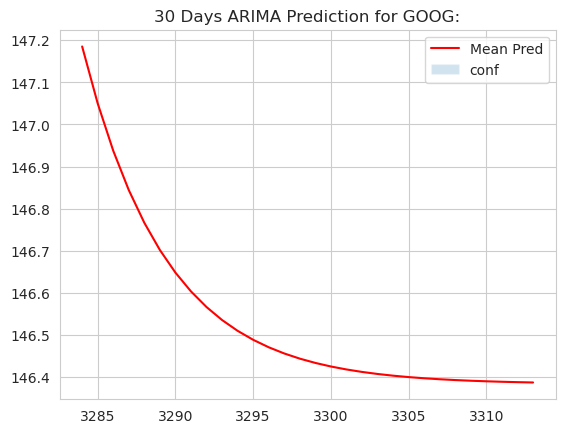

/home/hirak/anaconda3/envs/SIGNS_2024/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


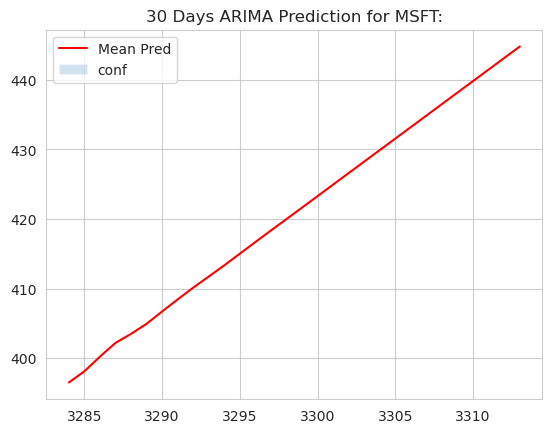

/home/hirak/anaconda3/envs/SIGNS_2024/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


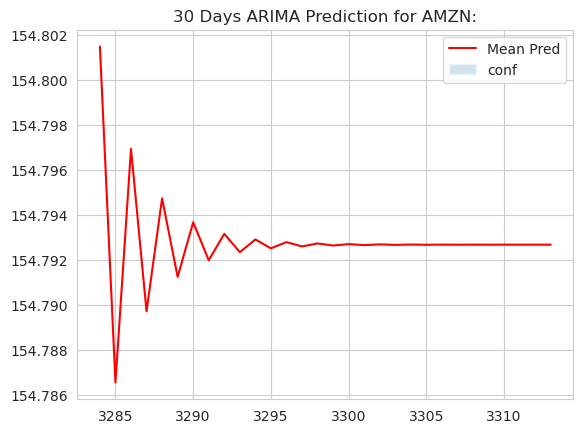

/home/hirak/anaconda3/envs/SIGNS_2024/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


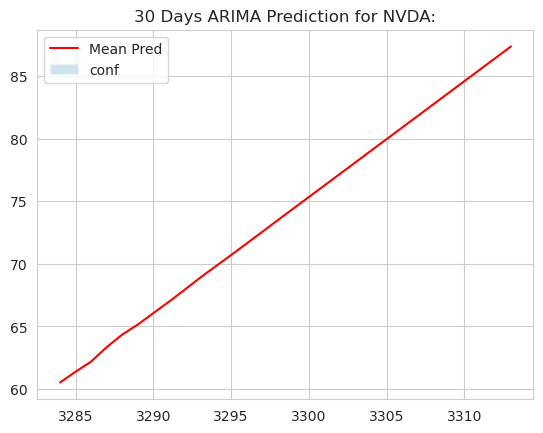

/home/hirak/anaconda3/envs/SIGNS_2024/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


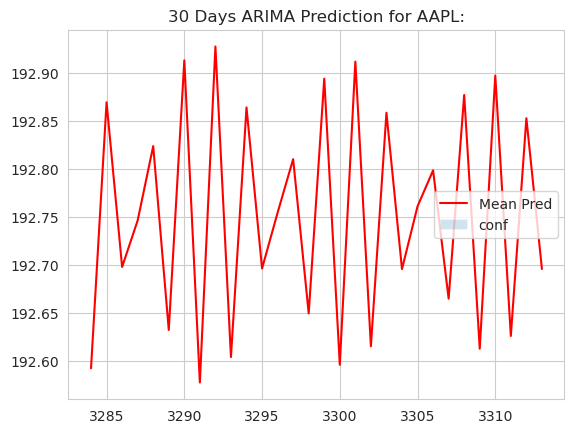

In [103]:
for i in range(len(df)):
    plt.plot(arima_result_train[i].forecast(step[i]), color='r', label='Mean Pred')
    # plt.plot(test[i][:step[i]], color='g', label='Actual')
    plt.fill_between(lower[i].index, lower[i], upper[i], alpha = 0.2, label='conf')
    plt.legend()
    plt.title(f"30 Days ARIMA Prediction for {stock_symbols[i]}:")
    plt.show()